# Indian Start-up Investment Analysis (2018 - 2021)

### Aim:
To assess the investment potential and attractiveness of the Indian startup ecosystem and provide recommendations for optimal course of action

### Objectives:
 
1. To assess the overall attractiveness of the Indian startup ecosystem based on funding trends and investor activity from 2018 to 2021.
2. To identify key sectors with high potential for investment based on their funding attractiveness and growth prospects.
3. To evaluate the investment opportunities across different stages of startup development and their risk-return profiles.
4. To analyze the geographical distribution of startups and funding to identify strategic investment locations and regional investment disparities.
5. To determine the correlation between funding amounts received by startups and their subsequent performance, providing insights into potential returns on investment and success rates.

### Business Questions:
1. What are the trends in funding amounts for Indian startups from 2018 to 2021? Are there any significant fluctuations or consistent growth patterns observed over this period?

2. Which sectors within the Indian startup ecosystem attracted the highest total funding during the specified timeframe? Are there any emerging sectors that have shown rapid growth in terms of investment?

3. What is the distribution of investment amounts across different stages of startup development (e.g., seed, early-stage, growth)? Are certain stages more favored by investors, and if so, why?

4. How is the geographical distribution of startups and funding within India? Are there specific regions or cities that have emerged as hubs for startup activity and investment, and are there any notable regional disparities?

5. Is there a correlation between the funding amounts received by startups and their subsequent performance metrics such as revenue growth, user acquisition, or market share? What insights can be gleaned from this correlation in terms of potential returns on investment and success rates?

6. Who are the top investors in the Indian startup ecosystem during the specified period? What sectors do they predominantly invest in, and are there any patterns in their investment strategies?

7. What are the characteristics of successful Indian startups in terms of founding team composition, industry focus, and funding trajectory? Can these characteristics be used to identify potential investment opportunities or predict startup success

### Hypothesis to Test:
 
Given the goal of assessing the investment potential in the Indian startup ecosystem, we hypothesize that:
 
**Null Hypothesis (H0)**: There is no clear pattern in the funding received by Indian startups from 2018 to 2021, and factors like sector, stage, location, and funding amount do not affect startup success.

**Alternative Hypothesis (H1)**: There is a clear pattern in the funding received by Indian startups from 2018 to 2021, and factors like sector, stage, location, and funding amount affect startup success.

## Import Packages for Analysis

In [362]:
# import relevant packages
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings('ignore')


#### Connect to server for 2020 and 2021 datasets

In [363]:
# load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials from .env file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
login=environment_variables.get("LOGIN")
password=environment_variables.get("PASSWORD")

# create a connection string
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"

In [364]:
# create connection using the pyodbc method 

connection = pyodbc.connect(connection_string)

#### Select tables of interest from the Database

In [365]:
# selecting tables from Database
db_query = ''' SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE' '''

#### View tables of interest from the Database for verification purposes

In [366]:
# call selected table from SQL Database
ata=pd.read_sql(db_query, connection)

ata

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


# Preview of Datasets

#### Data_2020

In [367]:
# Call DataFrame to understand DataFrame details for 2020
query= "SELECT * FROM dbo.LP1_startup_funding2020"
data_2020 =pd.read_sql(query, connection)

data_2020.head()



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


#### Data_2021

In [368]:
# Call DataFrame to understand DataFrame details for 2021.
query= "SELECT * FROM dbo.LP1_startup_funding2021"
data_2021 =pd.read_sql(query, connection)

data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


#### Data_2019 

#### Load csv data from other sources for analysis

In [369]:
# Read 2019 DataFrame to understand data structure.
data_2019=pd.read_csv("D:\\JHanson\\Justice Hanson\\DS Career Accelerator\Project 1\\Indian-Start-up-Investment-Analysis\\CSV Data\\startup_funding2019.csv")

data_2019.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


#### Data_2018 

In [370]:
# Read 2018 DataFrame to understand data structure.
data_2018=pd.read_csv("D:\\JHanson\\Justice Hanson\\DS Career Accelerator\Project 1\\Indian-Start-up-Investment-Analysis\\CSV Data\\startup_funding2018.csv")

data_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


#### Print Column Names for Comparison

In [371]:
# Print column names for comparison
print("Column names in data_2018:")
print(data_2018.columns)
print("\n")

# Column names for data_2019
print("Column names in data_2019:")
print(data_2019.columns)
print("\n")

# Column names for data_2020
print("Column names in data_2020:")
print(data_2020.columns)
print("\n")

# Column names for data_2021
print("Column names in data_2021:")
print(data_2021.columns)
print("\n")

Column names in data_2018:
Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')


Column names in data_2019:
Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')


Column names in data_2020:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')


Column names in data_2021:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')




Observations
1. **Inconsistency in Column Names**
2018 dataset has different column names compared to the rest of the datasets.

2. **Variations in Column Names**
The same type of information is represented by different column names across years (e.g., 'Company Name', 'Company/Brand', 'Company_Brand').

3. **Unique Columns**
Some years have unique columns not present in other years, which may complicate direct merging.

*This will be addressed by Standardizing column names across all datasets, align similar columns to a standard name for consistency and unique columns based on their importance and relevance will be handled while irrelevant columns will be dropped.*


#### Column renaming for consistency and merging

In [372]:
# Rename columns in each dataset
data_2018.rename(columns={
    'Company Name': 'company_name',
    'Industry': 'sector',
    'Round/Series': 'stage',
    'Amount': 'funding_amount',
    'Location': 'location',
    'About Company': 'description'
}, inplace=True)

# 2019 column mapping
data_2019.rename(columns={
    'Company/Brand': 'company_name',
    'HeadQuarter': 'location',
    'Sector': 'sector',
    'What it does': 'description',
    'Amount($)': 'funding_amount'
}, inplace=True)

# 2020 column mapping
data_2020.rename(columns={
    'Company_Brand': 'company_name',
    'What_it_does': 'description',
    'Amount': 'funding_amount'
}, inplace=True)

# 2021 column mapping
data_2021.rename(columns={
    'Company_Brand': 'company_name',
    'What_it_does': 'description',
    'Amount': 'funding_amount'
}, inplace=True)

# Merge datasets using the standardized column names
merged_data = pd.concat([data_2018, data_2019, data_2020, data_2021], ignore_index=True)

merged_data.head(5)


,company_name,sector,stage,funding_amount,location,description,Founded,Founders,Investor,Stage,HeadQuarter,Sector,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:

# Create a list of years corresponding to each dataset
years = [2018, 2019, 2020, 2021]

# Create a new column 'Year' and assign the respective year to each dataset
merged_data['Year'] = pd.concat([data.assign(Year=year) for data, year in zip([data_2018, data_2019, data_2020, data_2021], years)], ignore_index=True)['Year']

# Now the merged_data DataFrame will have a new column 'Year' with respective years assigned to each dataset


In [374]:
# Merge 'location' and 'HeadQuarter' columns into a single 'location' column
merged_data['location'] = merged_data['location'].combine_first(merged_data['HeadQuarter'])

# Merge 'industry' and 'Sector' columns into a single 'industry' column
merged_data['sector'] = merged_data['sector'].combine_first(merged_data['Sector'])

# Merge 'Stage' and 'stage' columns into a single 'stage' column
merged_data['stage'] = merged_data['Stage'].combine_first(merged_data['stage'])

# Drop the original columns
merged_data.drop(columns=['HeadQuarter', 'Sector', 'Stage'], inplace=True)



In [375]:
# Print merge_data for verification
merged_data.head(5)

,company_name,sector,stage,funding_amount,location,description,Founded,Founders,Investor,column10,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,NaN,2018


In [376]:
# View from the bottom
merged_data.tail(5)

,company_name,sector,stage,funding_amount,location,description,Founded,Founders,Investor,column10,Year
2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,NaN,2021
2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,NaN,2021
2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,NaN,2021
2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",NaN,2021
2878,WeRize,Financial Services,Series A,$8000000,Bangalore,India’s first socially distributed full stack ...,2019.0,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",NaN,2021


In [377]:
# Check data structure and information
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_name    2879 non-null   object 
 1   sector          2861 non-null   object 
 2   stage           1941 non-null   object 
 3   funding_amount  2622 non-null   object 
 4   location        2765 non-null   object 
 5   description     2879 non-null   object 
 6   Founded         2110 non-null   float64
 7   Founders        2334 non-null   object 
 8   Investor        2253 non-null   object 
 9   column10        2 non-null      object 
 10  Year            2879 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


Observation
Column 10 is virtually empty, indicating irrelevant column for analysis, while the dataset exhibits incorrect data types, requiring rectification for accurate insights.

In [378]:
# Drop Column 10 permanently
merged_data.drop(columns=['column10'], inplace=True)


In [379]:
# Confirm dropped column
merged_data.head()

,company_name,sector,stage,funding_amount,location,description,Founded,Founders,Investor,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,2018


# 2. Quality Checks on Columns

   #### 2.1 sector column

In [380]:
# Print all unique values in the 'sector' column
unique_sectors = merged_data['sector'].unique()

print("Unique values in 'sector' column:")
for sector in unique_sectors:
    print(sector)

Unique values in 'sector' column:
Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing
Agriculture, Farming
Credit, Financial Services, Lending, Marketplace
Financial Services, FinTech
E-Commerce Platforms, Retail, SaaS
Cloud Infrastructure, PaaS, SaaS
Internet, Leisure, Marketplace
Market Research
Information Services, Information Technology
Mobile Payments
B2B, Shoes
Internet
Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat
Food Delivery
Industrial Automation
Automotive, Search Engine, Service Industry
Finance, Internet, Travel
Accounting, Business Information Systems, Business Travel, Finance, SaaS
Artificial Intelligence, Product Search, SaaS, Service Industry, Software
Internet of Things, Waste Management
Air Transportation, Freight Service, Logistics, Marine Transportation
Financial Services
Food and Beverage
Autonomous Vehicles
Enterprise Software, Health Care, Hospital, Parenting, Personal Health, SaaS
Agricu

#### 2.1.0 sector redistribution using regex

In [381]:
import re

def sector_redistribution(sector):
    if isinstance(sector, str):
        if re.search(r'Credit|Financial Services|Lending|Marketplace|FinTech|Accounting|Banking|Venture Capital|Investment|Financial Exchanges|Micro Lending|Wealth Management|Insurance|Crowdfunding|Finance|Impact Investing|Personal Finance|Cryptocurrency|Trading Platform|Financial Services', sector):
            return 'Finance'
        elif re.search(r'Automotive|Air Transportation|Transport|Logistics|Vehicle|Transportation|Railroad|Last Mile Transportation|Electric Vehicle|Ride Sharing|Autonomous Vehicles|Marine Transportation|Battery', sector):
            return 'Transport'
        elif re.search(r'E-Commerce|Retail|Fashion|Jewelry|Shopping|Retail Technology|Marketplace|E-Commerce Platforms|Online Portals|Facilities Support Services|Procurement|Interior Design|Home Decor|Home Improvement|Home Services|Furniture', sector):
            return 'E-Commerce & Retail'
        elif re.search(r'Cloud Infrastructure|PaaS|SaaS|Software|Enterprise Software|Network Hardware|Network Security|Delivery Service|Information Technology|Cloud Computing|Data Analytics|AI|Machine Learning|Analytics|Big Data|IoT|Blockchain|Artificial Intelligence|Digital Marketing|SEO|SEM|Web Development|Digital Media|Media and Entertainment|Social Media|CRM|Virtual Reality|Augmented Reality|Enterprise Resource Planning', sector):
            return 'Technology & IT'
        elif re.search(r'Health Care|Hospital|Medical|Health Diagnostics|Medical Device|Wellness|Personal Health|Health Insurance|Health and Fitness|MedTech|Pharmaceutical|Life Science|Biotechnology|Diabetes|Elder Care|Alternative Medicine|mHealth|Dental|Home Health Care|Nutrition|Medical|HealthTech', sector):
            return 'Health & Medical'
        elif re.search(r'Food Delivery|Food and Beverage|Food Processing|Restaurants|Catering|Snack Food|Tea|Organic Food|Food Industry|FoodTech|Cloud Kitchen|Beverages|Fusion Beverages|Food & Nutrition|Food Production|Cooking', sector):
            return 'Food & Beverage'
        elif re.search(r'Advertising|Brand Marketing|Event Promotion|Marketing|Sponsorship|Ticketing|Digital Marketing|Creative Agency|Video Streaming|Broadcasting|News|Publishing|Media|Media Tech|Content Management|Content Publishing|Video Platform', sector):
            return 'Media & Advertising'
        elif re.search(r'Agriculture|AgTech|Farming|Farmers Market|AgriTech|Foodtech|Dairy', sector):
            return 'Agriculture'
        elif re.search(r'Tourism|Travel|TravelTech|Business Travel|Tourism & EV|Travel Accommodations|Hospitality|Hotel|Reservations', sector):
            return 'Travel & Hospitality'
        elif re.search(r'Consulting|Business Development|Advisory|Management Consulting|Outsourcing|Customer Service|Professional Services', sector):
            return 'Consulting & Professional Services'
        elif re.search(r'Education|E-Learning|EdTech|Higher Education|Education Management|Continuing Education|Skill Assessment|Tutoring|STEM Education|Career Planning|Training', sector):
            return 'Education'
        elif re.search(r'Supply Chain Management|Freight Service|Logistics|Delivery|Warehousing|Packaging Services|Supply Chain', sector):
            return 'Logistics & Supply Chain'
        elif re.search(r'Industrial Automation|Manufacturing|Robotics|Automation|Industrial|Mechanical & Industrial Engineering|Production|Factory|Industrial Technology|Automobile Technology', sector):
            return 'Manufacturing & Industrial'
        elif re.search(r'Energy|Renewable Energy|CleanTech|Solar|Electricity|Energy Storage|Environmental Services|GreenTech|Environmental Consulting|Natural Resources|Oil and Gas|Energy Technology', sector):
            return 'Energy & Environmental'
        elif re.search(r'Children|Parenting|Child Care|Preschool Daycare|KidTech', sector):
            return 'Parenting & Child Care'
        elif re.search(r'Sports|Fitness|Health and Fitness|Wellness|Yoga|eSports|Gaming|Video Games|Fantasy Sports|Sporting Goods|SportsTech|Health & Wellness', sector):
            return 'Sports & Fitness'
        elif re.search(r'Fashion|Beauty|Lifestyle|Cosmetics|Apparel|Footwear|Wearables|Fashion Tech|Jewelry|Skincare|Beauty Products|Beauty & Wellness', sector):
            return 'Fashion & Beauty'
        elif re.search(r'Construction|Building|Infrastructure|Real Estate|PropTech|Commercial Real Estate|Property Management|Rental Property|Housing|Home Services|Interior Design', sector):
            return 'Construction & Real Estate'
        elif re.search(r'HR|Human Resources|Staffing|Recruitment|HRTech', sector):
            return 'Human Resources'
        elif re.search(r'Finance|Financial Services|FinTech|Mobile Payments|Payments|Insurance|Insurance Tech|InsureTech|Insurtech|Personal Finance|Wealth Management|Investment|Mutual Funds|Investment Banking|Venture Capital', sector):
            return 'Finance'
        else:
            return 'Others'
    else:
        return 'Others'
    

# Apply the sector redistribution function to create a new column
merged_data['redistributed_sector'] = merged_data['sector'].apply(sector_redistribution)

  


#### Confirm sector redistribution

In [382]:
# Display the DataFrame with the new column
merged_data.head(5)  

,company_name,sector,stage,funding_amount,location,description,Founded,Founders,Investor,Year,redistributed_sector
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,2018,Media & Advertising
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,2018,Agriculture
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,2018,Finance
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,2018,Finance
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,2018,E-Commerce & Retail


In [383]:
merged_data.tail(5)

,company_name,sector,stage,funding_amount,location,description,Founded,Founders,Investor,Year,redistributed_sector
2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,2021,Human Resources
2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2015.0,Bala Sarda,IIFL AMC,2021,Food & Beverage
2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,2021,Finance
2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",2021,Education
2878,WeRize,Financial Services,Series A,$8000000,Bangalore,India’s first socially distributed full stack ...,2019.0,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",2021,Finance


#### stage column 

In [384]:
# Print unique values in the "stage" column
print(merged_data['stage'].unique())


['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Venture - Series Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt'
 'Series H' 'Series C' 'Series E' 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' nan 'Fresh funding' 'Pre series A' 'Series G'
 'Post series A' 'Seed funding' 'Seed fund' 'Series F' 'Series B+'
 'Seed round' 'Pre-series A' 'Pre-seed' 'Pre-series' 'Debt' 'Pre-series C'
 'Pre-series B' 'Bridge' 'Series B2' 'Pre- series A' 'Edge' 'Pre-Series B'
 'Seed A' 'Series A-1' 'Seed Funding' 'Pre-seed Round'
 'Seed Round & Series A' 'Pre Series A' 'Pre seed Round' 'Angel Round'
 'Pre series A1' 'Series E2' 'Seed Round' 'Bridge Round' 'Pre seed round'
 'Pre series B' 'Pre series C' 'Seed Investment' 'Series D1' 'Mid series'
 'Series C, D' '$1200000' 'Seed+' 'Series F2' 'Series A+' 'Series

#### swap wrong enteries to the right column

In [385]:
# Rows where stage should be moved to funding_amount and vice versa
rows_to_swap = [1768, 1781, 2221, 2344, 2208, 2347, 2818]

# Print the rows before swapping
#print("Before swapping:")
#print(merged_data.loc[rows_to_swap])

# Swap the values between stage and funding_amount for the identified rows
for row in rows_to_swap:
    stage_value = merged_data.loc[row, 'stage']
    funding_amount_value = merged_data.loc[row, 'funding_amount']
    merged_data.loc[row, 'stage'] = funding_amount_value
    merged_data.loc[row, 'funding_amount'] = stage_value

#### Confirm swapped values

In [386]:
# List of specific row indices to be printed
indices_to_print = [1768, 1781, 2221, 2344, 2208, 2347, 2818]

# Select the relevant columns and rows
selected_rows = merged_data.loc[indices_to_print, ['stage', 'funding_amount']]

# Print the DataFrame
print(selected_rows)

                                stage funding_amount
1768                         Upsparks       $1200000
1781                         Upsparks       $1200000
2221   ITO Angel Network, LetsVenture        $300000
2344                             None       $6000000
2208                     ah! Ventures        $300000
2347  JITO Angel Network, LetsVenture       $1000000
2818                             Seed            NaN


 #### Clean and standardize 'stage' column in DataFrame using these regex patterns 

In [387]:
# dictionaries of corection to clen the funding stage
Stage_corrections = {(r'Ang.+'): 'Angel', (r'Brid.+'): 'Bridge', (r'Debt.*'): 'Debt Financing', \
               (r'(Ear.+|Seed.*)'): 'Seed', (r'(S.+ies\sa.*)'): 'Series A',\
              (r'(S.+ies\sb.*)'): 'Series B', (r'(S.+ies\sc.*)'): 'Series C',\
              (r'(S.+ies\sd.*)'): 'Series D', (r'(S.+ies\sf.*)'): 'Series F',\
               (r'(S.+ies\se.*)'): 'Series E', (r'(S.+ies\sg.*)'): 'Series G', (r'(S.+ies\sh.*)'): 'Series H',\
              (r'(Htt.*|Ven.+|^$|Ji.*|let.+|Up.+|Ito.+|Ah!)'): 'Unknown', (r'(P.+ies\sa.*)'): 'Pre Series A',\
              (r'(P.+ies\sb.*)'): 'Pre Series B', (r'(P.+ies\sc.*)'): 'Pre Series C',\
              (r'(.*(f|F)un.+)'): 'Fresh Funding', (r'(.+seed.*)'): 'Pre Seed', np.nan: 'Unknown', (r'^Pe$'): 'Private equity'}

In [388]:
# Run and effect changes in the dataset
merged_data['stage'] = merged_data['stage'].str.capitalize().replace(Stage_corrections, regex=True)

In [389]:
# get the number of unique stages
stages = merged_data['stage'].sort_values().unique()
print(len(stages))
stages

31


array(['Angel', 'Bridge', 'Corporate round', 'Debt Financing', 'Edge',
       'Fresh Funding', 'Grant', 'Mid series', 'Non-equity assistance',
       'Post-ipo debt', 'Post-ipo equity', 'Pre Seed', 'Pre Series A',
       'Pre Series B', 'Pre Series C', 'Pre-series', 'Private equity',
       'Secondary market', 'Seed', 'Series A', 'Series B', 'Series C',
       'Series D', 'Series E', 'Series F', 'Series G', 'Series H',
       'Series i', 'Undisclosed', 'Unknown', 'Unknown ventures'],
      dtype=object)

#### Amount Column

In [390]:
# Characteristics to count
characteristics = ['—', '\$', '\$Undisclosed', 'Undisclosed', 'None', 'nan', 'Series C', 'Seed', 'Pre-series A', '₹']

# Count occurrences of each characteristic
counts = {}
for characteristic in characteristics:
    count = merged_data['funding_amount'].astype(str).str.count(characteristic).sum()
    counts[characteristic] = count

# Print counts
for characteristic, count in counts.items():
    print(f'{characteristic} - {count}')


— - 148
\$ - 1297
\$Undisclosed - 73
Undisclosed - 128
None - 2
nan - 255
Series C - 2
Seed - 1
Pre-series A - 1
₹ - 144


In [391]:
# Specify the stages to search for
stages_to_search = ['Series C', 'Seed', 'Pre-series A']

# Filter the DataFrame for rows containing the specified stages in funding_amount
filtered_data = merged_data[merged_data['funding_amount'].isin(stages_to_search)]

# Print column names
print("Index, Funding Amount, Stage")

# Print index, funding_amount, and corresponding stage side by side
for index, row in filtered_data.iterrows():
    print(f'{index}, {row["funding_amount"]}, {row["stage"]}')


Index, Funding Amount, Stage
1912, Series C, Unknown
1926, Series C, Unknown
1927, Seed, Unknown
2215, Pre-series A, Unknown


In [392]:
# Specify the stages to search for
stages_to_search = ['Series C', 'Seed', 'Pre-series A']

# Replace values in 'stage' column where 'funding_amount' matches the specified stages
merged_data.loc[merged_data['funding_amount'].isin(stages_to_search), 'stage'] = merged_data['funding_amount']

# Replace values in 'funding_amount' column with NaN where it matches the specified stages
merged_data.loc[merged_data['funding_amount'].isin(stages_to_search), 'funding_amount'] = float('nan')


In [393]:
# Specify the indexes to verify
indexes_to_verify = [1912, 1926, 1927, 2215]

# Filter the DataFrame for the specified indexes
filtered_data = merged_data.loc[indexes_to_verify]

# Print index, funding_amount, and stage side by side for verification
print("Index, Funding Amount, Stage")
for index, row in filtered_data.iterrows():
    print(f'{index}, {row["funding_amount"]}, {row["stage"]}')


Index, Funding Amount, Stage
1912, nan, Series C
1926, nan, Series C
1927, nan, Seed
2215, nan, Pre-series A


Exchage Rate
[Source:OFX](httpshttps://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/://)

In [394]:

# Provided exchange rates between 2018 - 2021
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

# Calculate the average exchange rate
average_exchange_rate = sum(exchange_rates.values()) / len(exchange_rates)

# Print the average exchange rate
print(f'Average exchange rate: {average_exchange_rate:.4f}')



Average exchange rate: 0.0140


In [395]:
# Define the exchange rate
exchange_rate = 0.0140

# Replace '—' with np.nan
merged_data['funding_amount'].replace('—', np.nan, inplace=True)

# Replace 'None' with np.nan
merged_data['funding_amount'].replace('None', np.nan, inplace=True)

# Remove dollar symbol and commas, then convert to float
merged_data['funding_amount'] = merged_data['funding_amount'].str.replace('$', '', regex=False)
merged_data['funding_amount'] = merged_data['funding_amount'].str.replace(',', '', regex=False)

# Convert Rupee values to USD and remove the rupee symbol
merged_data['funding_amount'] = merged_data['funding_amount'].apply(
    lambda x: float(x.replace('₹', '')) * exchange_rate if isinstance(x, str) and '₹' in x else x
)

#### Location

In [396]:

# Replace missing values with an empty string as a placeholder
merged_data['location'] = merged_data['location'].fillna('')

# Replace empty strings with the mode (most frequent city)
mode_city = merged_data['location'].mode()[0]
merged_data['location'] = merged_data['location'].replace('', mode_city)

# Extract city names from 'location' column
merged_data['location'] = merged_data['location'].apply(lambda x: x.split(',')[0].strip())


In [398]:
# Renaming some values in the location column
# Define the mapping for name changes
name_changes = {
    'Bangalore': 'Bangalore',
    'Bangalore City': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Dheli': 'New Delhi',
    'Gurugram\t#REF!' : 'Gurugram',
    'New dheli': 'New Delhi'
}
# Replace the names in the 'location' column
merged_data['location'] = merged_data['location'].replace(name_changes)

In [399]:
unique_locations = merged_data['location'].unique()
print(unique_locations)

['Bangalore' 'Mumbai' 'Gurgaon' 'Noida' 'Hyderabad' 'Kalkaji' 'Delhi'
 'India' 'Hubli' 'New Delhi' 'Chennai' 'Mohali' 'Kolkata' 'Pune' 'Jodhpur'
 'Kanpur' 'Ahmedabad' 'Azadpur' 'Haryana' 'Cochin' 'Faridabad' 'Jaipur'
 'Kota' 'Anand' 'Belgaum' 'Thane' 'Margão' 'Indore' 'Alwar' 'Kannur'
 'Trivandrum' 'Ernakulam' 'Kormangala' 'Uttar Pradesh' 'Andheri'
 'Mylapore' 'Ghaziabad' 'Kochi' 'Powai' 'Guntur' 'Kalpakkam' 'Bhopal'
 'Coimbatore' 'Worli' 'Alleppey' 'Chandigarh' 'Guindy' 'Lucknow'
 'Telangana' 'Gurugram' 'Surat' 'Uttar pradesh' 'Rajasthan' 'Tirunelveli'
 'Singapore' 'Gujarat' 'Kerala' 'Frisco' 'California' 'Dhingsara'
 'New York' 'Patna' 'San Francisco' 'San Ramon' 'Paris' 'Plano' 'Sydney'
 'San Francisco Bay Area' 'Bangaldesh' 'London' 'Milano' 'Palmwoods'
 'France' 'Samastipur' 'Irvine' 'Tumkur' 'Newcastle Upon Tyne' 'Shanghai'
 'Jiaxing' 'Rajastan' 'Ludhiana' 'Dehradun' 'San Franciscao' 'Tangerang'
 'Berlin' 'Seattle' 'Riyadh' 'Seoul' 'Bangkok' 'Warangal' 'Hyderebad'
 'Odisha' 'Biha

#### Investor column

In [400]:


# Define the list of indexes you want to print
indexes_to_print = [1912, 1926, 1927]

# Loop through the specified indexes and print the investor and funding_amount for each
for idx in indexes_to_print:
    if idx in merged_data.index:
        row = merged_data.loc[idx]
        print(f"{idx}: {row['Investor']}: {row['funding_amount']}")
    else:
        print(f"Index: {idx} not found in the DataFrame")


1912: $22000000: nan
1926: $22000000: nan
1927: $5000000: nan


In [401]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_name          2879 non-null   object 
 1   sector                2861 non-null   object 
 2   stage                 2879 non-null   object 
 3   funding_amount        1669 non-null   object 
 4   location              2879 non-null   object 
 5   description           2879 non-null   object 
 6   Founded               2110 non-null   float64
 7   Founders              2334 non-null   object 
 8   Investor              2253 non-null   object 
 9   Year                  2879 non-null   int64  
 10  redistributed_sector  2879 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


In [402]:
# Calculate the count of missing values for each column
missing_counts = merged_data.isna().sum()

# Calculate the percentage of missing values for each column
missing_percentages = (missing_counts / len(merged_data)) * 100

# Combine counts and percentages into a DataFrame
missing_data_summary = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percentage': missing_percentages})

# Print the summary
print("Missing Values Summary:")
print(missing_data_summary)


Missing Values Summary:
                      Missing Count  Missing Percentage
company_name                      0            0.000000
sector                           18            0.625217
stage                             0            0.000000
funding_amount                 1210           42.028482
location                          0            0.000000
description                       0            0.000000
Founded                         769           26.710663
Founders                        545           18.930184
Investor                        626           21.743661
Year                              0            0.000000
redistributed_sector              0            0.000000


In [403]:
# Drop the columns 'Founded' and 'Founders' permanently
merged_data.drop(columns=['Founded', 'Founders'], inplace=True)


In [404]:

# Fill empty rows and string values with NaN
merged_data['funding_amount'] = pd.to_numeric(merged_data['funding_amount'], errors='coerce')

# Impute NaN values with the median
median_value = merged_data['funding_amount'].median()
merged_data['funding_amount'] = merged_data['funding_amount'].fillna(median_value)

# Ensure the column is of float dtype
merged_data['funding_amount'] = merged_data['funding_amount'].astype(float)

# Verify the changes

print(merged_data['funding_amount'].isnull().sum())


0


In [405]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_name          2879 non-null   object 
 1   sector                2861 non-null   object 
 2   stage                 2879 non-null   object 
 3   funding_amount        2879 non-null   float64
 4   location              2879 non-null   object 
 5   description           2879 non-null   object 
 6   Investor              2253 non-null   object 
 7   Year                  2879 non-null   int64  
 8   redistributed_sector  2879 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 202.6+ KB


In [415]:
# Drop rows with missing values in the 'sector' column
merged_data.dropna(subset=['sector'], inplace=True)

# Drop the 'Investor' column permanently
merged_data.drop(columns=['Investor'], inplace=True)


In [416]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2861 entries, 0 to 2878
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_name          2861 non-null   object 
 1   sector                2861 non-null   object 
 2   stage                 2861 non-null   object 
 3   funding_amount        2861 non-null   float64
 4   location              2861 non-null   object 
 5   description           2861 non-null   object 
 6   Year                  2861 non-null   int64  
 7   redistributed_sector  2861 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 201.2+ KB


In [417]:
# Count duplicate rows
duplicate_count = merged_data.duplicated().sum()

# Print the count of duplicate rows
print("Number of Duplicate Rows:", duplicate_count)


Number of Duplicate Rows: 45


In [418]:
# Drop duplicate rows
merged_data.drop_duplicates(inplace=True)


In [419]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2816 entries, 0 to 2878
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_name          2816 non-null   object 
 1   sector                2816 non-null   object 
 2   stage                 2816 non-null   object 
 3   funding_amount        2816 non-null   float64
 4   location              2816 non-null   object 
 5   description           2816 non-null   object 
 6   Year                  2816 non-null   int64  
 7   redistributed_sector  2816 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 198.0+ KB


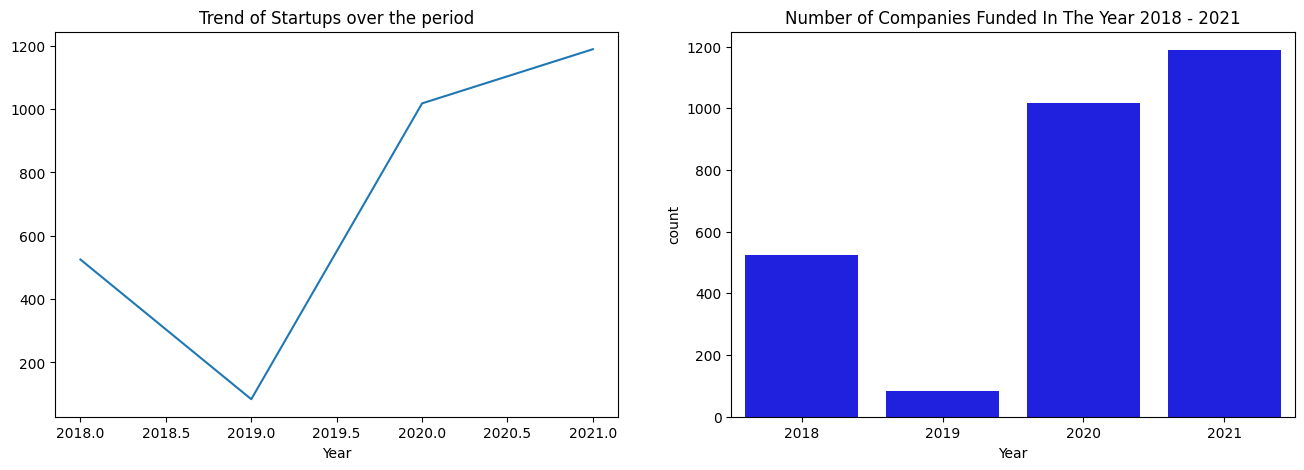

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

base_color = 'blue'
# plot a line gragh to show the trend of startup with the period 2018 - 2021
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
funding_year_count = merged_data.groupby(['Year'])['company_name'].count()
funding_year_count.plot();
plt.title('Trend of Startups over the period')


# plot a bar chart to show the number of startups within each year
plt.subplot(1, 2, 2)
sns.countplot(
    x='Year',  
    data=merged_data,  
    color=base_color)

plt.title('Number of Companies Funded In The Year 2018 - 2021')
plt.show()

In [427]:
# count the number of startups in each city
top_ten_HQ = merged_data['redistributed_sector'].value_counts().head(10).sort_values()
top_ten_HQ

redistributed_sector
Sports & Fitness         71
Agriculture              73
Food & Beverage          80
E-Commerce & Retail     122
Transport               151
Health & Medical        153
Education               186
Technology & IT         328
Finance                 383
Others                 1057
Name: count, dtype: int64

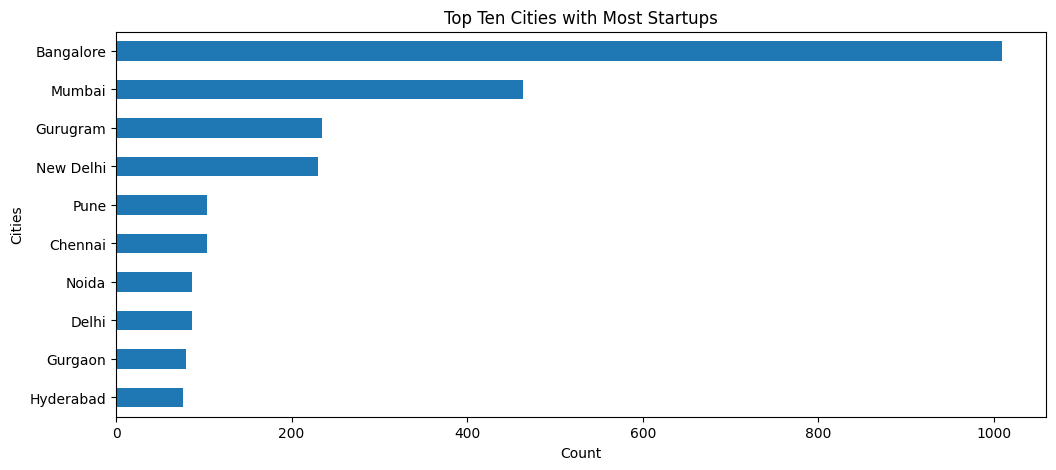

In [422]:
# plot a horinzontal bar chart to show the number of startups in each city
plt.figure(figsize=(12, 5))
top_ten_HQ.plot(kind='barh')
plt.title('Top Ten Cities with Most Startups')
plt.xlabel('Count')
plt.ylabel('Cities');

In [425]:
# check the top 10 cities with the most startups
Top_ten_sectors = merged_data['sector'].value_counts().head(10)
Top_ten_sectors

sector
FinTech               171
EdTech                141
Fintech                82
Financial Services     75
E-commerce             73
Edtech                 70
AgriTech               43
Food & Beverages       38
Automotive             37
Healthcare             36
Name: count, dtype: int64

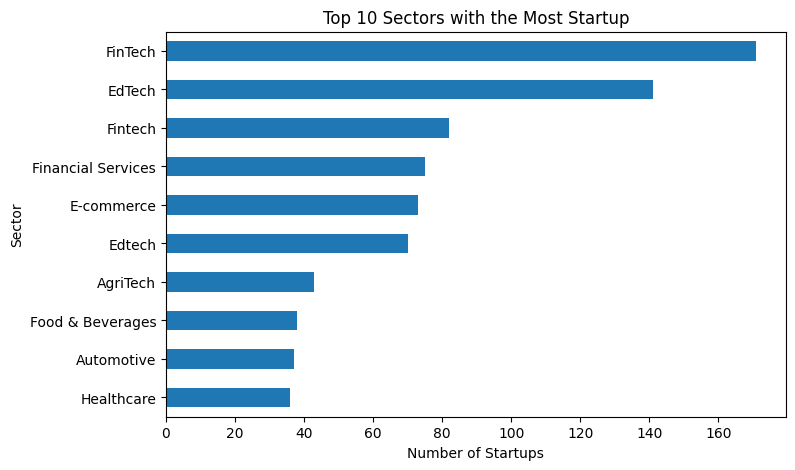

In [426]:
# plot a bar chart to show the top 10 sectors with the most number of startups
plt.figure(figsize=(8, 5))
Top_ten_sectors.sort_values().plot(kind='barh')
plt.title('Top 10 Sectors with the Most Startup')
plt.xlabel('Number of Startups')
plt.ylabel('Sector');

In [423]:
# get the average(mean) funding yearly
average_funding_year= merged_data.groupby(['Year']).agg({'funding_amount': 'mean'})
average_funding_year.reset_index(inplace=True)
average_funding_year

,Year,funding_amount
0,2018,1.339909e+07
1,2019,3.851706e+07
2,2020,3.000000e+06
3,2021,1.513991e+08


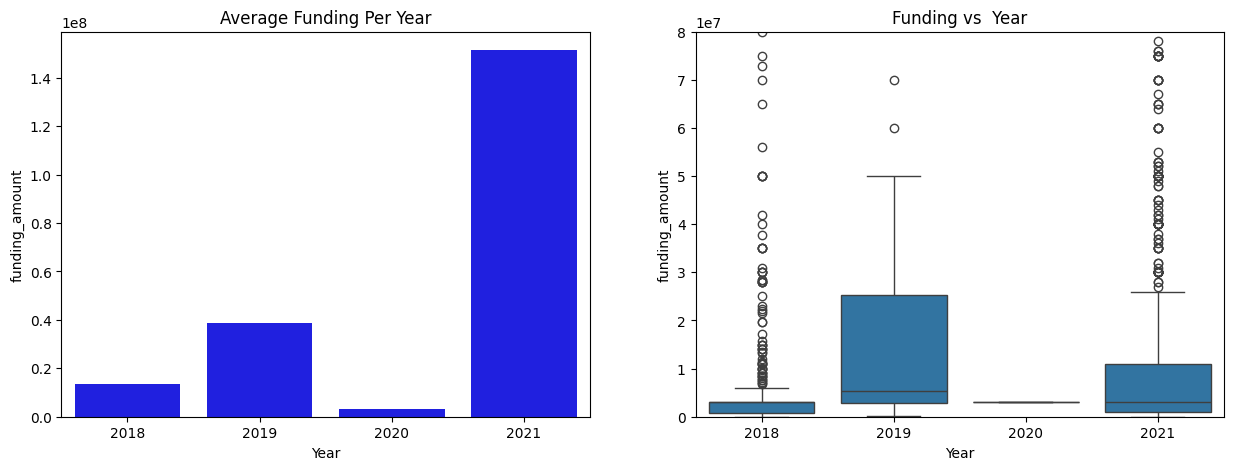

In [424]:
# plot a bar chart to show the avearge funding yearly
plt.figure(figsize=(15,  5))
plt.subplot(1, 2, 1)
sns.barplot(
    data=average_funding_year,
    x='Year',
    y='funding_amount',
    color=base_color)
plt.title('Average Funding Per Year')

# plot a box plot to show the avearge funding yearly
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_data, y='funding_amount', x='Year')
plt.title('Funding vs  Year');
plt.ylim(-10,80000000);

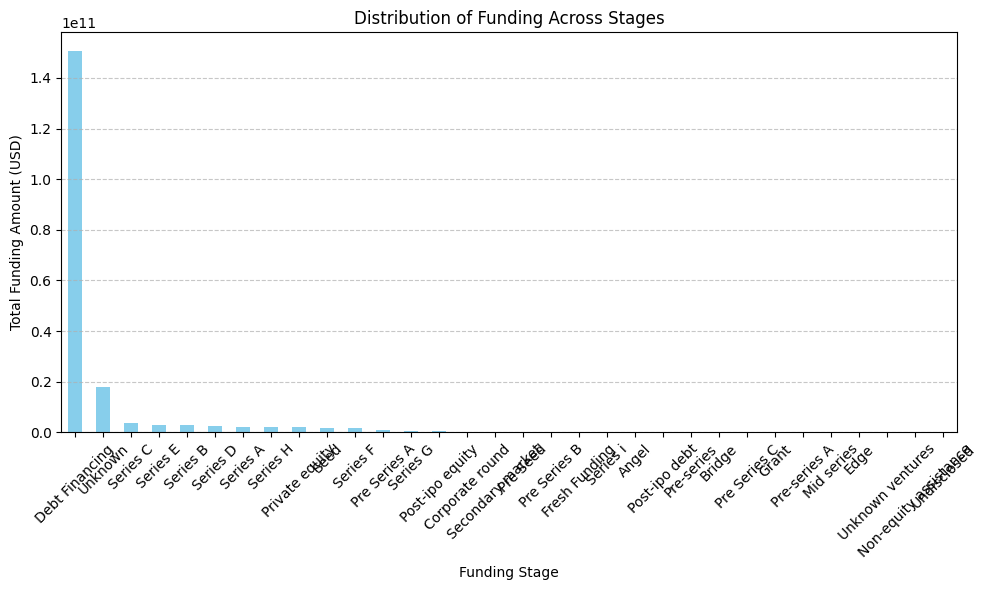

In [430]:
# Grouping the data by funding stage and calculating the total funding for each stage
funding_distribution = merged_data.groupby('stage')['funding_amount'].sum().sort_values(ascending=False)

# Plotting the distribution
plt.figure(figsize=(10, 6))
funding_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Funding Across Stages')
plt.xlabel('Funding Stage')
plt.ylabel('Total Funding Amount (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [339]:
# Total number of rows
total_rows = merged_data.shape[0]

# Number of unique companies
unique_companies = merged_data['company_name'].nunique()

# Number of duplicate values
duplicates = merged_data.duplicated('company_name').sum()

# Number of missing values
missing_values = merged_data['company_name'].isnull().sum()

# Percentage of unique values
unique_percentage = (unique_companies / total_rows) * 100

# Percentage of missing values
missing_percentage = (missing_values / total_rows) * 100

print("Number of unique values in company_name:", unique_companies)
print("Number of duplicate values in company_name:", duplicates)
print("Percentage of unique values in company_name: {:.2f}%".format(unique_percentage))
print("Percentage of missing values in company_name: {:.2f}%".format(missing_percentage))



Number of unique values in company_name: 2214
Number of duplicate values in company_name: 665
Percentage of unique values in company_name: 76.90%
Percentage of missing values in company_name: 0.00%


In [343]:
# Drop duplicate values permanently
merged_data.drop_duplicates('company_name', inplace=True)

# Number of unique companies after dropping duplicates
unique_companies = merged_data['company_name'].nunique()

# Number of remaining rows after dropping duplicates
remaining_rows = merged_data.shape[0]

# Percentage of remaining rows after dropping duplicates
remaining_percentage = (remaining_rows / total_rows) * 100

print("Number of unique values in company_name after dropping duplicates:", unique_companies)
print("Percentage of remaining rows after dropping duplicates: {:.2f}%".format(remaining_percentage))


Number of unique values in company_name after dropping duplicates: 2214
Percentage of remaining rows after dropping duplicates: 76.90%


In [344]:
merged_data

,company_name,sector,stage,funding_amount,location,description,Investor,Year,redistributed_sector
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,2018,Media & Advertising
1,Happy Cow Dairy,"Agriculture, Farming",Seed,560000.0,Mumbai,A startup which aggregates milk from dairy far...,NaN,2018,Agriculture
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,910000.0,Gurgaon,Leading Online Loans Marketplace in India,NaN,2018,Finance
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,NaN,2018,Finance
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,3000000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018,E-Commerce & Retail
...,...,...,...,...,...,...,...,...,...
2871,TechEagle,Aviation & Aerospace,Seed,500000.0,Gurugram,"Safe, secure & reliable On-Demand Drone delive...",India Accelerator,2021,Others
2872,Voxelgrids,Deeptech,Unknown,5000000.0,Bangalore,Voxelgrids is an Magnetic Resonance Imaging te...,Zoho,2021,Others
2873,Cogos Technologies,Logistics & Supply Chain,Pre Series A,2000000.0,Bangalore,A smart-tech-enabled platform offering a one-s...,Transworld Group,2021,Transport
2875,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,IIFL AMC,2021,Food & Beverage


In [345]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2214 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_name          2214 non-null   object 
 1   sector                2205 non-null   object 
 2   stage                 2214 non-null   object 
 3   funding_amount        2214 non-null   float64
 4   location              2214 non-null   object 
 5   description           2214 non-null   object 
 6   Investor              1599 non-null   object 
 7   Year                  2214 non-null   int64  
 8   redistributed_sector  2214 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 173.0+ KB


In [346]:
# Fill missing values in 'Investor' and 'sector' columns with the most frequent value
merged_data['Investor'].fillna(merged_data['Investor'].mode()[0], inplace=True)
merged_data['sector'].fillna(merged_data['sector'].mode()[0], inplace=True)


In [347]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2214 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_name          2214 non-null   object 
 1   sector                2214 non-null   object 
 2   stage                 2214 non-null   object 
 3   funding_amount        2214 non-null   float64
 4   location              2214 non-null   object 
 5   description           2214 non-null   object 
 6   Investor              2214 non-null   object 
 7   Year                  2214 non-null   int64  
 8   redistributed_sector  2214 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 173.0+ KB
